# Gaussian Mixture Models

## Load Libraries and Generate Data

In [1]:
import io
import requests
import warnings
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

# Suppress matplotlib deprecation warnings
warnings.filterwarnings('ignore')

# Make this notebook's output stable across runs
random_state = 1000
np.random.seed(random_state)

# Plot formatting
%matplotlib inline
sns.set()
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Generate Data

In [2]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)),
                    random_state=random_state)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples=250, centers=1, center_box=(0, 0), random_state=random_state)
X2 = X2 + [2, -1]
y2 = y2 + 2

X = np.r_[X1, X2]
y = np.r_[y1, y2]

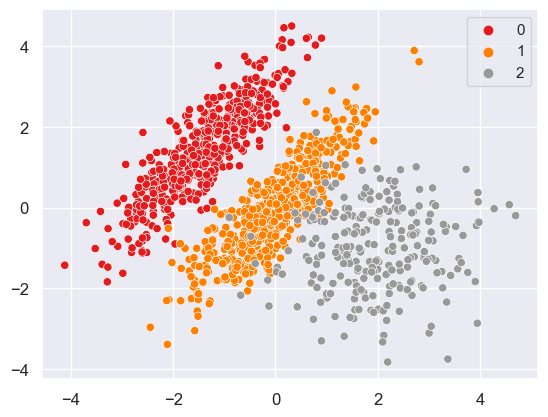

In [3]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                palette=sns.color_palette('Set1', as_cmap=True))
plt.show()

## Fit a Gaussian Mixture Model

In [4]:
# Fit the model
gm = GaussianMixture(n_components=3, n_init=10, random_state=random_state)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=1000)

In [5]:
# Access the weights, the means, and the covariances
gm.weights_

array([0.40004444, 0.41463787, 0.18531769])

In [6]:
gm.means_

array([[-1.44271935e+00,  1.38466571e+00],
       [ 1.66560737e-02, -1.29565682e-03],
       [ 2.05933546e+00, -1.05847089e+00]])

In [7]:
gm.covariances_

array([[[0.6856597 , 0.81678593],
        [0.81678593, 1.29778176]],

       [[0.70455817, 0.81622028],
        [0.81622028, 1.3385459 ]],

       [[0.85148691, 0.10012768],
        [0.10012768, 1.00089026]]])

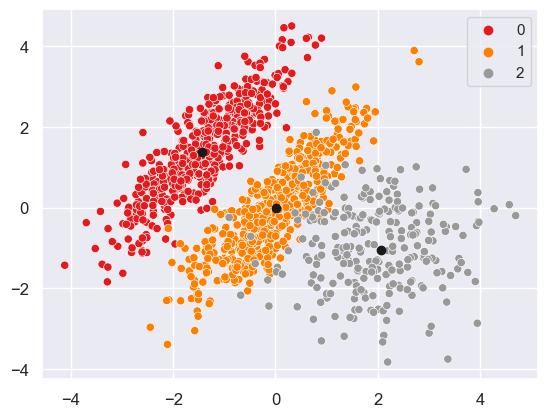

In [8]:
# Plot the means
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                palette=sns.color_palette('Set1', as_cmap=True))

means = gm.means_
plt.scatter(x=means[:, 0], y=means[:, 1], color='k')
plt.show()

In [9]:
# Verify that the algorithm converged
print(gm.converged_)
print(gm.n_iter_)

True
4


In [10]:
# Get the cluster assignments
y_prob = gm.predict_proba(X)
y_pred = np.argmax(y_prob, axis=1)

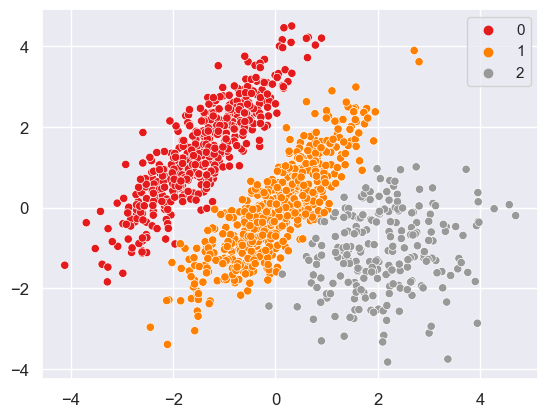

In [11]:
# Plot the GM clusters
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred,
                palette=sns.color_palette('Set1', as_cmap=True))
plt.show()

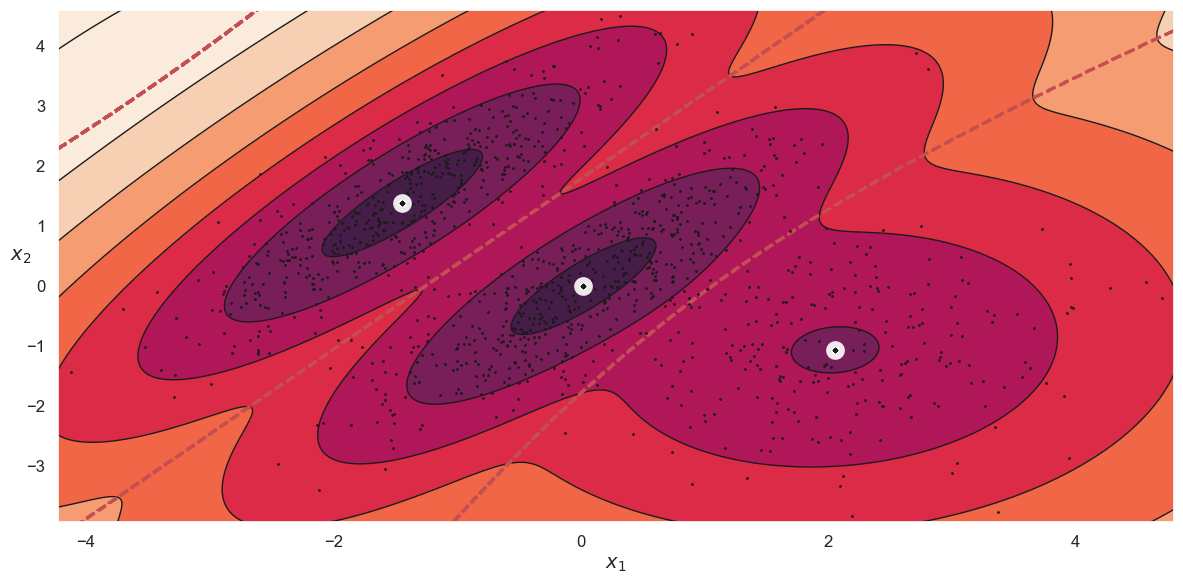

In [12]:
# Visualize the Gaussian Mixture
# Source: HOML
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=5, linewidths=3,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(12, 6))
plot_gaussian_mixture(gm, X)
plt.tight_layout()
plt.show()

## Gaussian Mixture for the Mall Customer Data

In [13]:
# Cluster on spend and income
url = 'https://raw.githubusercontent.com/natecraig/aiml/main/Data/mall.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
X = df[['Income', 'Spend']]

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [14]:
# Fit the model
gm = GaussianMixture(n_components=5, n_init=10, random_state=random_state)
gm.fit(X_scale)

GaussianMixture(n_components=5, n_init=10, random_state=1000)

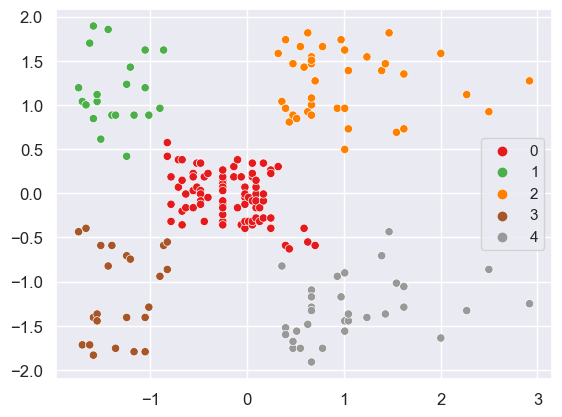

In [15]:
# Get the cluster assignments and visualize
y_prob = gm.predict_proba(X_scale)
y_pred = np.argmax(y_prob, axis=1)

sns.scatterplot(x=X_scale[:, 0], y=X_scale[:, 1], hue=y_pred,
                palette=sns.color_palette('Set1', as_cmap=True))
plt.show()

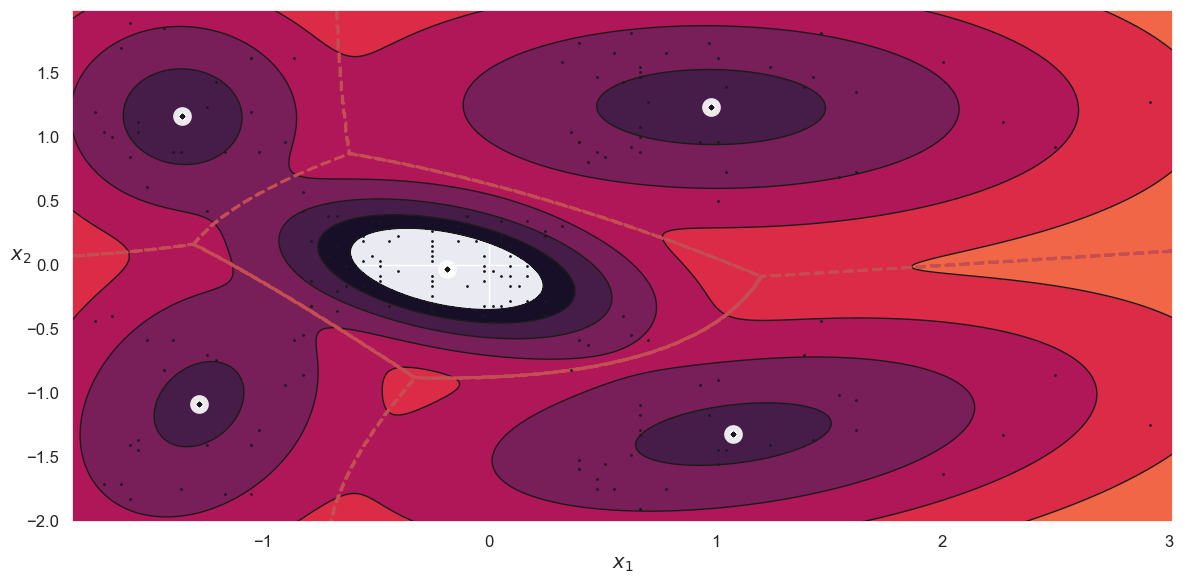

In [16]:
plt.figure(figsize=(12, 6))
plot_gaussian_mixture(gm, X_scale)
plt.tight_layout()
plt.show()

## Exercise
Fit a Gaussian mixture to data generated by scikit-learn's make_moons functionality.

In [17]:
X, y = make_moons(n_samples=1000, noise=0.05)